# Analisando os Sentimentos na Discografia de Louis Tomlinson

A análise de sentimentos e inferência de emoções em músicas são técnicas que buscam identificar e interpretar as emoções expressas nas letras das canções. Esse tipo de análise utiliza algoritmos e modelos de aprendizado de máquina, como o Processamento de Linguagem Natural (PLN), para avaliar as palavras e frases contidas nas letras, classificando-as em polaridades como positivo, negativo ou neutro.

As letras de músicas são ricas em emoção e podem refletir uma ampla gama de sentimentos, como amor, tristeza, alegria, raiva e nostalgia, logo, a análise de sentimentos permite que artistas, produtores e ouvintes compreendam melhor como a música pode impactar as emoções humanas e a percepção do público. Com o avanço das tecnologias de Inteligência Artificial (IA) e PLN, a análise de sentimento em músicas está se tornando cada vez mais sofisticada, permitindo uma compreensão mais profunda e complexa das emoções humanas expressas através da arte musical.

## Importando Bibliotecas

In [119]:
# Importando bibliotecas de manipulação e análise de dados
import pandas as pd  # Usado para manipulação de tabelas e dataframes
import numpy as np   # Usado para operações matemáticas e arrays numéricos

# Biblioteca para processamento de imagens
from PIL import Image  # Usado para abrir, manipular e processar imagens

# Biblioteca para geração de nuvem de palavras (wordcloud)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# STOPWORDS: remove palavras irrelevantes
# ImageColorGenerator: usa as cores de uma imagem para colorir a wordcloud

# Biblioteca de NLP (Processamento de Linguagem Natural)
from nltk.tokenize import word_tokenize  # Quebra textos em palavras (tokens)

# Biblioteca para visualização de dados
import matplotlib.pyplot as plt  # Criação de gráficos e visualizações
from matplotlib.pyplot import figure  # Ajuste de tamanho de figuras
%matplotlib inline

# Baixando recursos da biblioteca NLTK
import nltk
nltk.download('punkt_tab')  # Tokenizador de pontuação/tabulação
nltk.download('vader_lexicon')  # Léxico para análise de sentimentos com VADER (análise de sentimentos)

# Biblioteca de visualização estatística
import seaborn as sns  # Estilização e gráficos estatísticos avançados

# Instalando bibliotecas com ! (comando de terminal usado no Jupyter)
!pip install shapely  # manipulação de formas geométricas
!pip install descartes       # Necessária para exibir formas geométricas com matplotlib
!pip install pyplutchik      # Biblioteca para visualização de emoções com o modelo de Plutchik

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Carregando arquivo com as músicas

O arquivo CSV foi gerado no notebook *Lyrics.ipynb*, contendo informações detalhadas sobre as músicas do famoso cantor. O *dataset* inclui dados como título das faixas, álbum e ano de lançamento através da API *Genius*. A exportação para CSV permite uma fácil visualização, análise e compartilhamento dos dados.

In [120]:
# Leitura do Arquivo
df=pd.read_csv("LouisTomlinsonLyrics.csv")

# Remove a coluna 'release_date'
df = df.drop(columns=['release_date'])

# Visualização do Dataframe
df

title  \
0                        Back To You   
1                         Always You   
2                     Only the Brave   
3                        Defenceless   
4                          Two of Us   
5                           Miss You   
6                          Too Young   
7           Copy of a Copy of a Copy   
8                           Fearless   
9                              Habit   
10                             Walls   
11                       Perfect Now   
12     Don’t Let It Break Your Heart   
13                        We Made It   
14                     Just Like You   
15                      Kill My Mind   
16                    Bigger Than Me   
17                    Silver Tongues   
18        Written All Over Your Face   
19                            Change   
20                           Chicago   
21                       Lucky Again   
22                         Saturdays   
23                      The Greatest   
24                     All This Time   
25                        Angels Fly   
26  She Is Beauty We Are World Class   
27           Holding On To Heartache   
28                    Face the Music   
29                          Headline   
30          That’s the Way Love Goes   
31                     Common People   
32                  Out of My System   
33        Saved By A Stranger (Demo)   
34                          Paradise   
35                High In California   
36                      The Way I Do   

                                               lyrics  \
0    bebe rexha know know know well days even know...   
1    went amsterdam without could think known went...   
2    pour mercy mercy fire history breakin rules c...   
3    come runnin like moth flame tell take easy ea...   
4    minute since called just hear answerphone yea...   
5    imagination something takin smiles fakin ever...   
6    young know everything young wish could seen a...   
7    curse dreamers divin head first broken beaks ...   
8    cash weekend treasures suit second wife sayin...   
9    always said mess eventually told that expect ...   
10   nothing wakes like wakin alone that left cupb...   
11   jeans feel pretty hard miss wish could point ...   
12   twenty seven place side london doing better d...   
13   cause made underestimated always underrated s...   
14   band cigarette left hand whole world right ha...   
15   nightmare dance floor hate want more total di...   
16   when somebody told would change used hide beh...   
17   gettin high amber wave going deep ones same m...   
18   babe written face hurricane behind door come ...   
19   time lives easy gettin complete long away kno...   
20   baby names liked brother doin okay still gett...   
21   give give gone away just tell another lived l...   
22   supposed feelin dirty cheap silver street qua...   
23   tell nothing could make late said plan time c...   
24   three four  late tryna find words ages just p...   
25   nothin really matters nothin really hurts tal...   
26   conversation currency shapes become language ...   
27   said holdin heartache said wear like crown go...   
28   good right wrong stories made young scare lov...   
29   sometimes wake hear silence pride hide beauty...   
30   here words know wanna hear think moved mate a...   
31   came good home house full terrace dreams that...   
32   slowly never wanna slowly wanna faster toward...   
33   livin dream sounded pretty good until woke wo...   
34   maybe maybe believe that anything else could ...   
35   blue like light surroundin seems different ar...   
36   stay ever night long drive home every mile de...   

                                     Album  release_year  Word Count  
0                           Pop Party 2017          2017         186  
1                 Walls (Japanese Edition)          2020         108  
2                 Walls (Japanese Edition)          2020          66  
3                 Walls (Japanese Edition)          2020   

In [121]:
# Eliminando músicas remix e repetidas
df = df.drop(index=[0,7,14,33,34,36])

# Reseta o índice, se necessário
df.reset_index(drop=True, inplace=True)

# Visualização do Dataframe
df

title  \
0                         Always You   
1                     Only the Brave   
2                        Defenceless   
3                          Two of Us   
4                           Miss You   
5                          Too Young   
6                           Fearless   
7                              Habit   
8                              Walls   
9                        Perfect Now   
10     Don’t Let It Break Your Heart   
11                        We Made It   
12                      Kill My Mind   
13                    Bigger Than Me   
14                    Silver Tongues   
15        Written All Over Your Face   
16                            Change   
17                           Chicago   
18                       Lucky Again   
19                         Saturdays   
20                      The Greatest   
21                     All This Time   
22                        Angels Fly   
23  She Is Beauty We Are World Class   
24           Holding On To Heartache   
25                    Face the Music   
26                          Headline   
27          That’s the Way Love Goes   
28                     Common People   
29                  Out of My System   
30                High In California   

                                               lyrics  \
0    went amsterdam without could think known went...   
1    pour mercy mercy fire history breakin rules c...   
2    come runnin like moth flame tell take easy ea...   
3    minute since called just hear answerphone yea...   
4    imagination something takin smiles fakin ever...   
5    young know everything young wish could seen a...   
6    cash weekend treasures suit second wife sayin...   
7    always said mess eventually told that expect ...   
8    nothing wakes like wakin alone that left cupb...   
9    jeans feel pretty hard miss wish could point ...   
10   twenty seven place side london doing better d...   
11   cause made underestimated always underrated s...   
12   nightmare dance floor hate want more total di...   
13   when somebody told would change used hide beh...   
14   gettin high amber wave going deep ones same m...   
15   babe written face hurricane behind door come ...   
16   time lives easy gettin complete long away kno...   
17   baby names liked brother doin okay still gett...   
18   give give gone away just tell another lived l...   
19   supposed feelin dirty cheap silver street qua...   
20   tell nothing could make late said plan time c...   
21   three four  late tryna find words ages just p...   
22   nothin really matters nothin really hurts tal...   
23   conversation currency shapes become language ...   
24   said holdin heartache said wear like crown go...   
25   good right wrong stories made young scare lov...   
26   sometimes wake hear silence pride hide beauty...   
27   here words know wanna hear think moved mate a...   
28   came good home house full terrace dreams that...   
29   slowly never wanna slowly wanna faster toward...   
30   blue like light surroundin seems different ar...   

                                  Album  release_year  Word Count  
0              Walls (Japanese Edition)          2020         108  
1              Walls (Japanese Edition)          2020          66  
2              Walls (Japanese Edition)          2020         143  
3              Walls (Japanese Edition)          2019         163  
4              Walls (Japanese Edition)          2017         190  
5              Walls (Japanese Edition)          2020         139  
6              Walls (Japanese Edition)          2020         117  
7              Walls (Japanese Edition)          2020         125  
8              Walls (Japanese Edition)          2020         114  
9              Walls (Japanese Edition)          2020         158  
10             Walls (Japanese Edition)          2019         174  
11             Walls (Japanese Edition)          2019         211  
12             Walls (Japanese Edition)  

In [122]:
# Lista de palavras indesejadas presentes na discografia e não identificadas na etapa de tokenização
indesejadas = ['louis','tomlinson','na','yeah','that','this','what']

# Remove as palavras indesejadas, e salva de volta como um texto longo
df['lyrics'] = df['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))

# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 3746 palavras no dataset de letra.
Existem 814 palavras únicas no dataset de letras.


## Análise da Discografia
Primeiramente, será realizada uma análise exploratória do dataset como um todo, visando compreender sua estrutura, distribuição e características principais. Essa etapa é essencial para identificar padrões, possíveis inconsistências e *insights* iniciais sobre os dados. Essa análise preliminar ajudará a direcionar investigações mais específicas e a garantir a qualidade dos dados antes de aprofundar o estudo.

### Analisando o Dataset

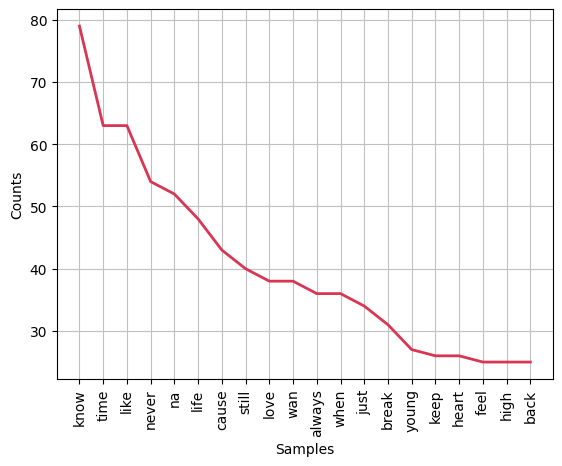

In [123]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Resultado do Gráfico</strong><br>
    Top 20 palavras mais frequentes na discografia do cantor.
</div>

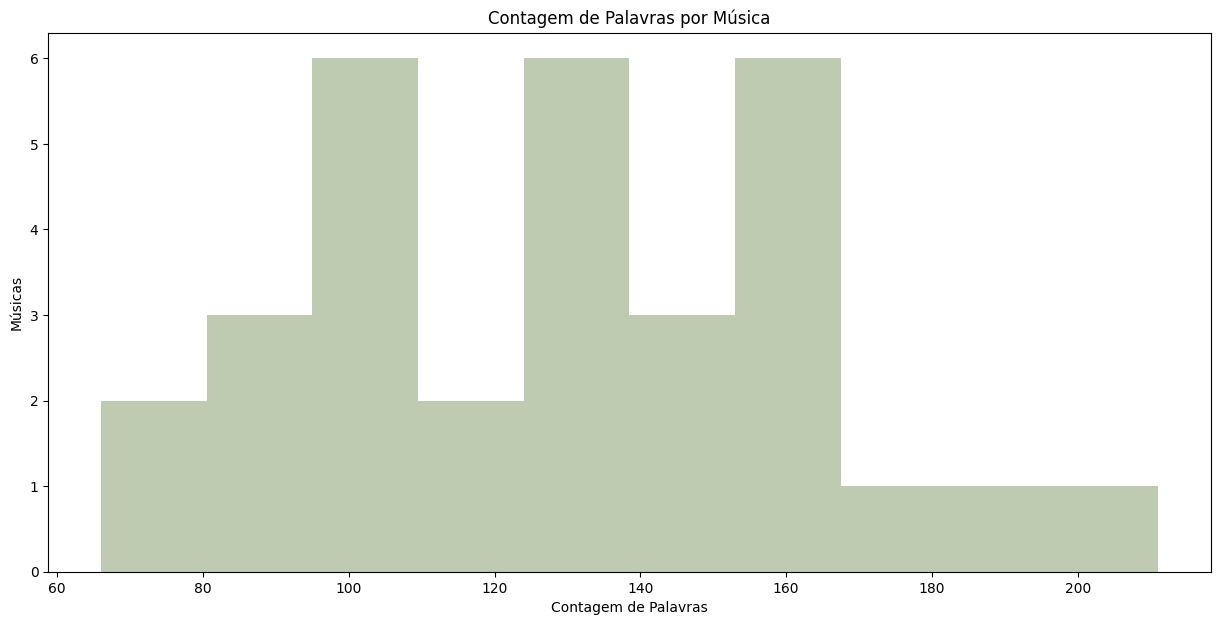

In [124]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    O resultado é um histograma que representa a distribuição da contagem de palavras das músicas. Cada barra no histograma mostra quantas músicas caem dentro de cada intervalo de contagem de palavras. Isso permite visualizar rapidamente como as músicas se distribuem em relação à sua contagem de palavras, identificando padrões, como se a maioria das músicas tende a ser mais curtas ou mais longas.
</div>

### Análise de Sentimento da Discografia

A análise de sentimentos é uma técnica da área de Processamento de Linguagem Natural (PLN) que tem como objetivo identificar e classificar emoções expressas em textos, como opiniões, comentários, avaliações e postagens em redes sociais. Um dos principais aspectos dessa análise é a **polaridade**, que indica a direção do sentimento expresso: **positivo**, **negativo** ou **neutro**.

**Polaridade Positiva** refere-se a textos que expressam sentimentos favoráveis, elogios ou apreciações. Exemplos incluem palavras como "ótimo", "maravilhoso", "excelente" e "gostei". Comentários positivos geralmente indicam satisfação com um produto, serviço ou experiência.

**Polaridade Negativa**, por sua vez, é associada a emoções negativas, críticas ou insatisfações. Termos como "horrível", "péssimo", "não gostei" e "decepcionante" são indicadores comuns. Esse tipo de polaridade ajuda a identificar pontos de melhoria a partir de feedbacks negativos dos usuários.

Já a **Polaridade Neutra** está presente em textos que não expressam uma opinião clara ou não possuem carga emocional significativa. Comentários como "o produto chegou ontem", "estava chovendo" ou "fiz a compra hoje" são exemplos de frases informativas, sem julgamento emocional.

Em aplicações práticas, a identificação correta da polaridade é essencial para empresas e pesquisadores compreenderem melhor o comportamento e a percepção dos usuários. Isso pode influenciar estratégias de marketing, aprimoramento de produtos e até mesmo monitoramento de reputação online.

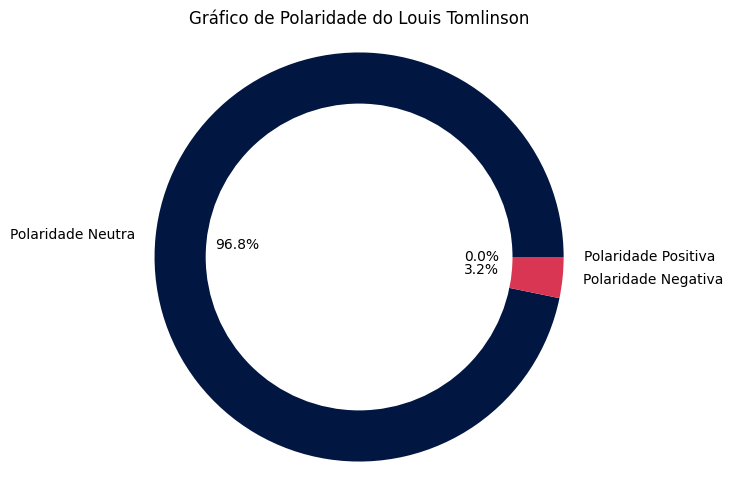

In [125]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do Louis Tomlinson')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    A discografia apresenta 3.2% de polaridade negativa.
</div>

### Nuvem de Palavras
A **nuvem de palavras** (ou *word cloud*, em inglês) é uma técnica visual utilizada para representar a frequência ou relevância de palavras em um determinado conjunto de dados textuais. Nesse tipo de visualização, quanto mais uma palavra aparece em um texto ou conjunto de textos, maior será o seu destaque na nuvem — normalmente por meio de um tamanho de fonte mais elevado.

Essa ferramenta é muito usada em análises exploratórias de dados textuais, especialmente em áreas como análise de sentimentos, mineração de texto, marketing digital, pesquisa acadêmica, entre outras. Ela permite uma compreensão rápida dos termos mais recorrentes em conteúdos como comentários de usuários, postagens em redes sociais, discursos políticos, letras de músicas ou avaliações de produtos.

A construção de uma nuvem de palavras geralmente envolve etapas de pré-processamento do texto, como:
- **Remoção de stopwords** (palavras comuns como “de”, “o”, “e”, que não agregam valor semântico relevante);
- **Lematização ou stemming** (redução de palavras à sua forma base);
- **Tratamento de pontuação e acentuação**.

Embora seja uma técnica simples, a nuvem de palavras oferece uma forma intuitiva e visual de identificar temas recorrentes, tendências e padrões de linguagem.

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count'], dtype='object')


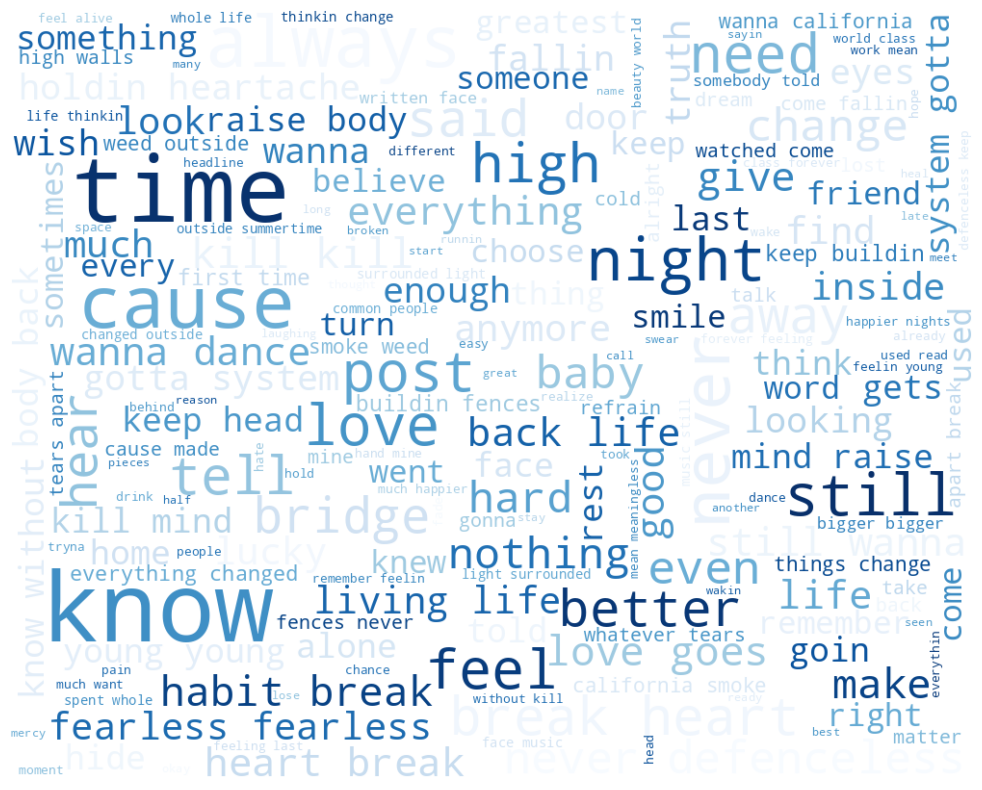

In [126]:
# Exibir os nomes das colunas do DataFrame
print(df.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df['lyrics'] = df['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

## Análise NRC para Inferência de Emoções
O arquivo NRC (National Research Council) é um recurso amplamente utilizado na análise de sentimentos, especialmente no contexto de processamento de linguagem natural (PLN) e mineração de texto. O NRC desenvolveu um léxico de sentimentos que categoriza palavras em diferentes emoções, permitindo que pesquisadores e desenvolvedores analisem letras de músicas, resenhas e outros textos em relação a sentimentos específicos.

### Estrutura do Arquivo NRC
O léxico do NRC é estruturado em várias colunas, onde as palavras são associadas a diferentes emoções e sentimentos, incluindo: Alegria, Tristeza, Medo,
Raiva, Surpresa, Desprezo, Confiança e Antipatia. Cada palavra no léxico é marcada como presente ou ausente em relação a essas emoções, permitindo que os usuários quantifiquem e analisem a presença de sentimentos em um texto.

### Aplicações na Análise de Músicas
Identificação de Emoções: Ao aplicar o léxico NRC às letras de músicas, é possível identificar quais emoções são mais proeminentes em uma canção. Por exemplo, uma letra pode ser classificada como predominantemente alegre, triste ou reflexiva.

**Comparação Entre Músicas:** O NRC permite a comparação de diferentes músicas ou álbuns, facilitando a análise de como os sentimentos evoluem ao longo do tempo ou entre diferentes artistas. Essa comparação pode revelar como as temáticas abordadas nas letras mudam conforme a carreira de um artista avança.

**Análise de Tendências:** Ao analisar um conjunto de músicas (por exemplo, todas as músicas lançadas em um determinado ano), os pesquisadores podem identificar tendências emocionais na música popular. Isso pode fornecer insights sobre a cultura e os sentimentos coletivos de uma sociedade em um período específico.

**Desenvolvimento de Recomendação:** O entendimento dos sentimentos nas músicas pode ajudar a criar sistemas de recomendação mais personalizados, sugerindo músicas com base no estado emocional do ouvinte.

O uso do arquivo NRC na análise de letras de músicas é uma ferramenta poderosa para compreender as emoções expressas na música. Com a capacidade de quantificar sentimentos, pesquisadores e desenvolvedores podem explorar a rica tapeçaria emocional das letras e como elas ressoam com os ouvintes. Essa análise não apenas enriquece nossa compreensão da música como arte, mas também nos oferece uma janela para as emoções humanas e a cultura contemporânea.

In [127]:
#Biblioteca para usar o NRC alinhado ao NLTK
from collections import defaultdict

# Carregar o lexicon NRC
nrc = pd.read_csv("NRC.tsv", sep='\t', names=['word', 'sentiment', 'association'])
nrc = nrc[nrc['association'] == 1]

# Definir emoções (exclui 'positive' e 'negative')
emotion_sentiments = {
    'anger', 'anticipation', 'disgust', 'fear',
    'joy', 'sadness', 'surprise', 'trust'
}

# Dicionário: palavra -> lista de emoções
nrc_dict = defaultdict(list)
for _, row in nrc.iterrows():
    if row['sentiment'] in emotion_sentiments:
        nrc_dict[row['word']].append(row['sentiment'])

# Emoções positivas e negativas para score
positive = {'joy', 'trust', 'anticipation', 'surprise'}
negative = {'anger', 'fear', 'disgust', 'sadness'}

# Função de análise
def analyze_text(text):
    tokens = word_tokenize(text.lower())
    sentiments_count = defaultdict(int)

    for token in tokens:
        for sentiment in nrc_dict.get(token, []):
            sentiments_count[sentiment] += 1

    score = sum(sentiments_count[s] for s in positive) - \
            sum(sentiments_count[s] for s in negative)

    dominant_emotion = max(sentiments_count, key=sentiments_count.get) if sentiments_count else 'neutral'
    filter_label = 'intenso' if abs(score) > 2 else 'neutro'

    return pd.Series([score, dominant_emotion, filter_label], index=['score', 'sentiment', 'filter'])

# Aplicar no DataFrame
df[['score', 'sentiment', 'filter']] = df['lyrics'].apply(analyze_text)

# Normalizar a coluna 'score' entre -1 e 1
min_score = df['score'].min()
max_score = df['score'].max()

# Evitar divisão por zero se max == min
if min_score != max_score:
    df['score'] = 2 * ((df['score'] - min_score) / (max_score - min_score)) - 1
else:
    df['score'] = 0  # ou qualquer valor neutro

# Fazendo cópias para análises profundas
df_original = df.copy()
df_original_2 = df_original.copy()
df_original_3 = df_original.copy()

# Exibir resultado
df

title  \
0                         Always You   
1                     Only the Brave   
2                        Defenceless   
3                          Two of Us   
4                           Miss You   
5                          Too Young   
6                           Fearless   
7                              Habit   
8                              Walls   
9                        Perfect Now   
10     Don’t Let It Break Your Heart   
11                        We Made It   
12                      Kill My Mind   
13                    Bigger Than Me   
14                    Silver Tongues   
15        Written All Over Your Face   
16                            Change   
17                           Chicago   
18                       Lucky Again   
19                         Saturdays   
20                      The Greatest   
21                     All This Time   
22                        Angels Fly   
23  She Is Beauty We Are World Class   
24           Holding On To Heartache   
25                    Face the Music   
26                          Headline   
27          That’s the Way Love Goes   
28                     Common People   
29                  Out of My System   
30                High In California   

                                               lyrics  \
0   went amsterdam without could think known went ...   
1   pour mercy mercy fire history breakin rules cr...   
2   come runnin like moth flame tell take easy eas...   
3   minute since called just hear answerphone know...   
4   imagination something takin smiles fakin every...   
5   young know everything young wish could seen al...   
6   cash weekend treasures suit second wife saying...   
7   always said mess eventually told expect from s...   
8   nothing wakes like wakin alone left cupboard f...   
9   jeans feel pretty hard miss wish could point v...   
10  twenty seven place side london doing better do...   
11  cause made underestimated always underrated sa...   
12  nightmare dance floor hate want more total dis...   
13  when somebody told would change used hide behi...   
14  gettin high amber wave going deep ones same ma...   
15  babe written face hurricane behind door come r...   
16  time lives easy gettin complete long away know...   
17  baby names liked brother doin okay still getti...   
18  give give gone away just tell another lived li...   
19  supposed feelin dirty cheap silver street quar...   
20  tell nothing could make late said plan time ca...   
21  three four late tryna find words ages just pat...   
22  nothin really matters nothin really hurts talk...   
23  conversation currency shapes become language s...   
24  said holdin heartache said wear like crown gon...   
25  good right wrong stories made young scare love...   
26  sometimes wake hear silence pride hide beauty ...   
27  here words know wanna hear think moved mate al...   
28  came good home house full terrace dreams enoug...   
29  slowly never wanna slowly wanna faster towards...   
30  blue like light surroundin seems different aro...   

                                  Album  release_year  Word Count     score  \
0              Walls (Japanese Edition)          2020         108  0.081081   
1              Walls (Japanese Edition)          2020          66 -0.063063   
2              Walls (Japanese Edition)          2020         143 -0.279279   
3              Walls (Japanese Edition)          2019         163  0.153153   
4              Walls (Japanese Edition)          2017         190  0.099099   
5              Walls (Japanese Edition)          2020         139  1.000000   
6              Walls (Japanese Edition)          2020         117  0.117117   
7              Walls (Japanese Edition)          2020         125  0.207207   
8              Walls (Japanese Edition)          2020         114 -0.117117   
9              Walls (Japanese Edition)          2020         158  0.369369   
10             Walls (Japanese Edition)          2019   

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Normalização de Dados</strong><br>
    Para evitar validação cruzada de dados e separação de base de teste e aplicação, foi utilizado uma função de normalização de dados.
</div>

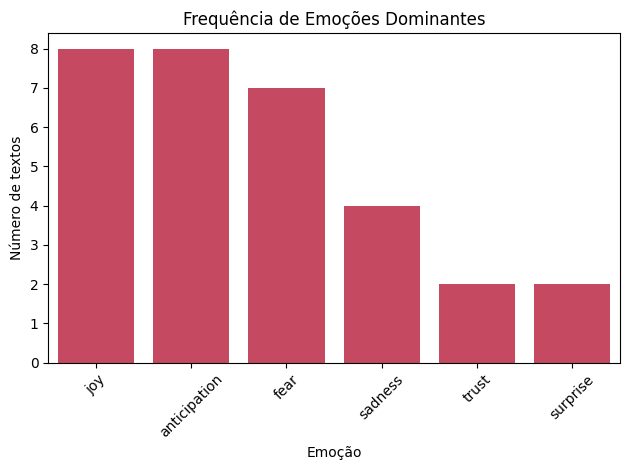

In [128]:
 # Cria um gráfico de barras com contagem
sns.countplot(
    x='sentiment',
    data=df,
    order=df['sentiment'].value_counts().index,  # Ordena as barras pela frequência de cada emoção
    color='#D93654'
)

# Construção do gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout()                             # Ajusta o layout para evitar que os textos fiquem cortados
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    A discografia possui alto teor de alegria e antecipação.
</div>

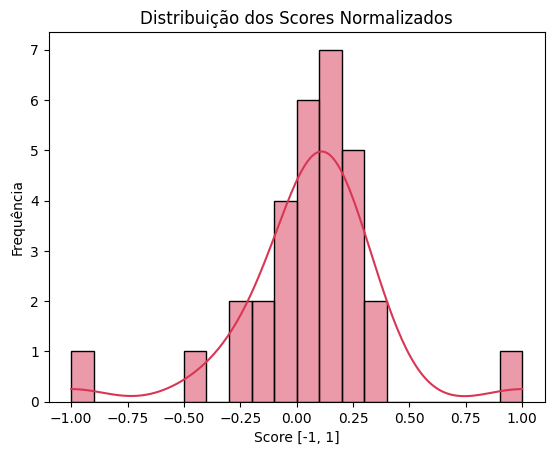

In [129]:
sns.histplot(df['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    Os scores estão bem concentrados no neutro das polaridades.
</div>

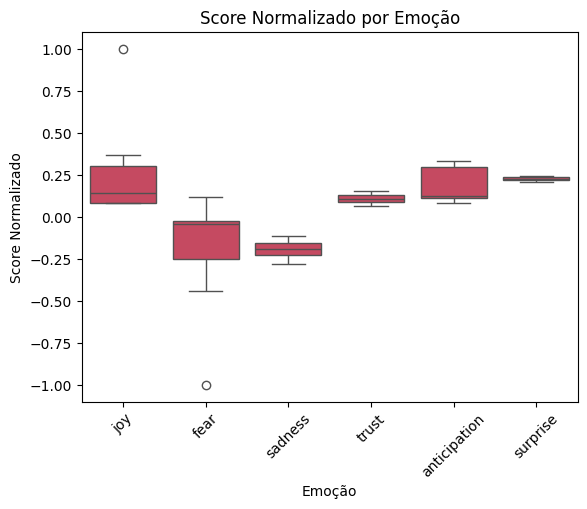

In [130]:
sns.boxplot(x='sentiment', y='score', data=df, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

Esse gráfico boxplot compara os scores normalizados de sentimento para cada emoção.

- O **centro da caixa** é a **mediana** (valor do meio).
- As **caixas** mostram o intervalo interquartílico (de 25% a 75% dos dados).
- Os **"bigodes"** (linhas fora das caixas) mostram a dispersão.
- Os **pontos fora do padrão** são **outliers**.



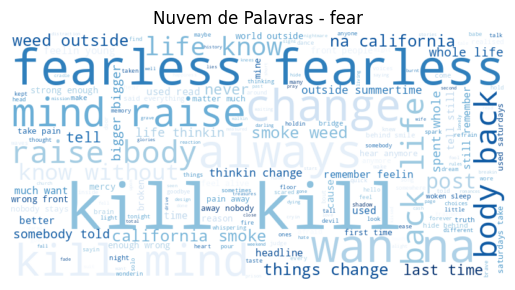

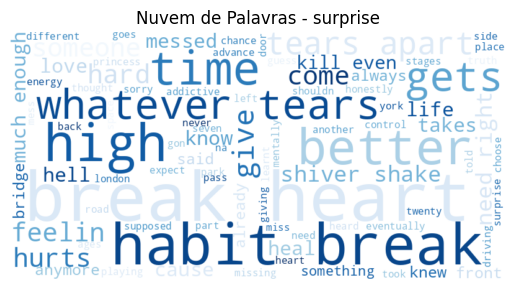

Nenhuma palavra encontrada para a emoção: disgust
Nenhuma palavra encontrada para a emoção: anger


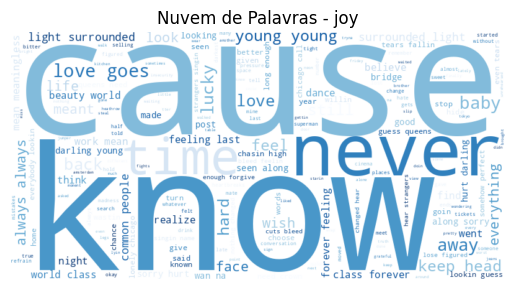

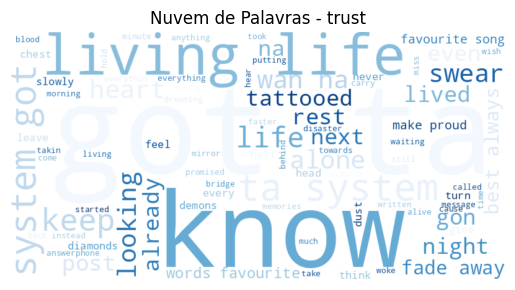

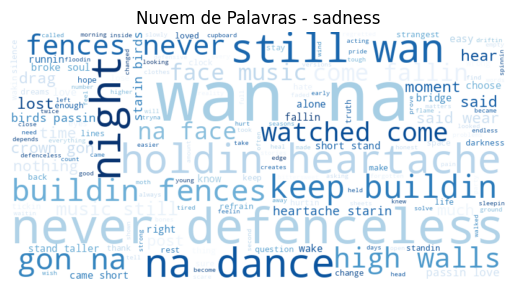

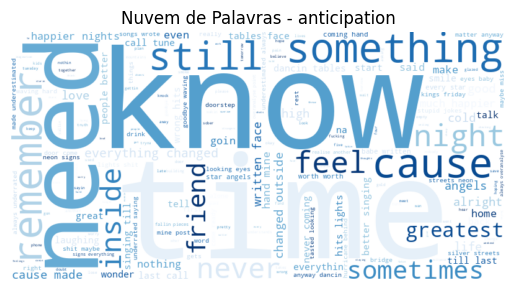

In [131]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []
    for text in df[df['sentiment'] == emotion]['lyrics']:
        words.extend(word_tokenize(text.lower()))

    # Verificar se há palavras antes de gerar a nuvem
    if not words:
        print(f"Nenhuma palavra encontrada para a emoção: {emotion}")
        continue

    # Gerar a nuvem de palavras com fundo branco e tons de azul
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',  # Fundo branco
        colormap='Blues'  # Paleta de tons de azul
    ).generate(' '.join(words))

    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuvem de Palavras - {emotion}')
    plt.show()

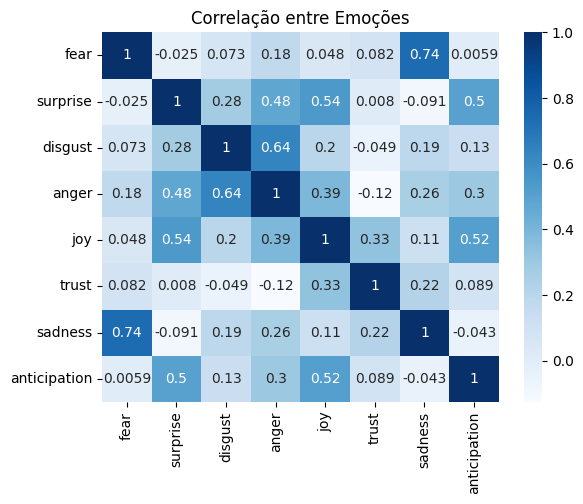

In [132]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

## Análise do álbum Walls

*Walls* é o primeiro álbum de estúdio do cantor britânico, lançado em 31 de janeiro de 2020. O álbum foi precedido por quatro *singles*, "Two of Us", "Kill My Mind", "We Made It", "Don't Let It Break Your Heart" e "Walls". O álbum recebeu críticas mistas, mas obteve sucesso comercial, vendendo 35.000 cópias após seu lançamento e estreando no número nove na *Billboard 200* dos EUA.

Mais informações em: https://pt.wikipedia.org/wiki/Harry_Styles_(%C3%A1lbum)

In [136]:
# Filtrando o DataFrame para excluir músicas do seu álbum
df_l1 = df[df['Album'].isin(['Walls (Japanese Edition)'])]

# Exibindo o DataFrame filtrado
df_l1

title  \
0                      Always You   
1                  Only the Brave   
2                     Defenceless   
3                       Two of Us   
4                        Miss You   
5                       Too Young   
6                        Fearless   
7                           Habit   
8                           Walls   
9                     Perfect Now   
10  Don’t Let It Break Your Heart   
11                     We Made It   
12                   Kill My Mind   

                                               lyrics  \
0   went amsterdam without could think known went ...   
1   pour mercy mercy fire history breakin rules cr...   
2   come runnin like moth flame tell take easy eas...   
3   minute since called just hear answerphone know...   
4   imagination something takin smiles fakin every...   
5   young know everything young wish could seen al...   
6   cash weekend treasures suit second wife saying...   
7   always said mess eventually told expect from s...   
8   nothing wakes like wakin alone left cupboard f...   
9   jeans feel pretty hard miss wish could point v...   
10  twenty seven place side london doing better do...   
11  cause made underestimated always underrated sa...   
12  nightmare dance floor hate want more total dis...   

                       Album  release_year  Word Count     score  \
0   Walls (Japanese Edition)          2020         108  0.081081   
1   Walls (Japanese Edition)          2020          66 -0.063063   
2   Walls (Japanese Edition)          2020         143 -0.279279   
3   Walls (Japanese Edition)          2019         163  0.153153   
4   Walls (Japanese Edition)          2017         190  0.099099   
5   Walls (Japanese Edition)          2020         139  1.000000   
6   Walls (Japanese Edition)          2020         117  0.117117   
7   Walls (Japanese Edition)          2020         125  0.207207   
8   Walls (Japanese Edition)          2020         114 -0.117117   
9   Walls (Japanese Edition)          2020         158  0.369369   
10  Walls (Japanese Edition)          2019         174  0.243243   
11  Walls (Japanese Edition)          2019         211  0.333333   
12  Walls (Japanese Edition)          2019         138 -1.000000   

       sentiment   filter  
0            joy  intenso  
1           fear   neutro  
2        sadness  intenso  
3          trust  intenso  
4   anticipation  intenso  
5            joy  intenso  
6           fear  intenso  
7       surprise  intenso  
8        sadness  intenso  
9            joy  intenso  
10      surprise  intenso  
11  anticipation  intenso  
12          fear  intenso

In [137]:
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_l1['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 1687 palavras no dataset de letra.
Existem 465 palavras únicas no dataset de letras.


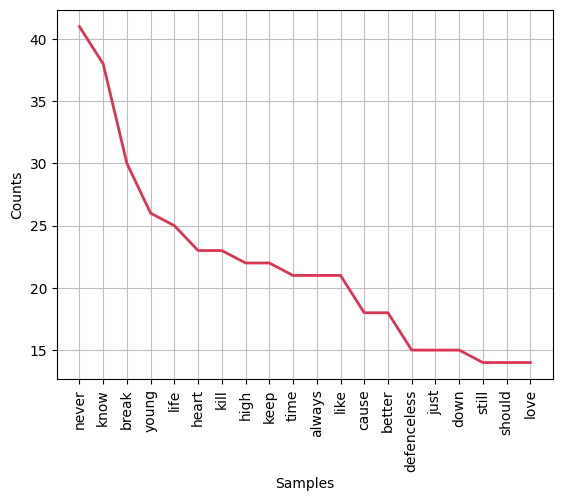

In [138]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

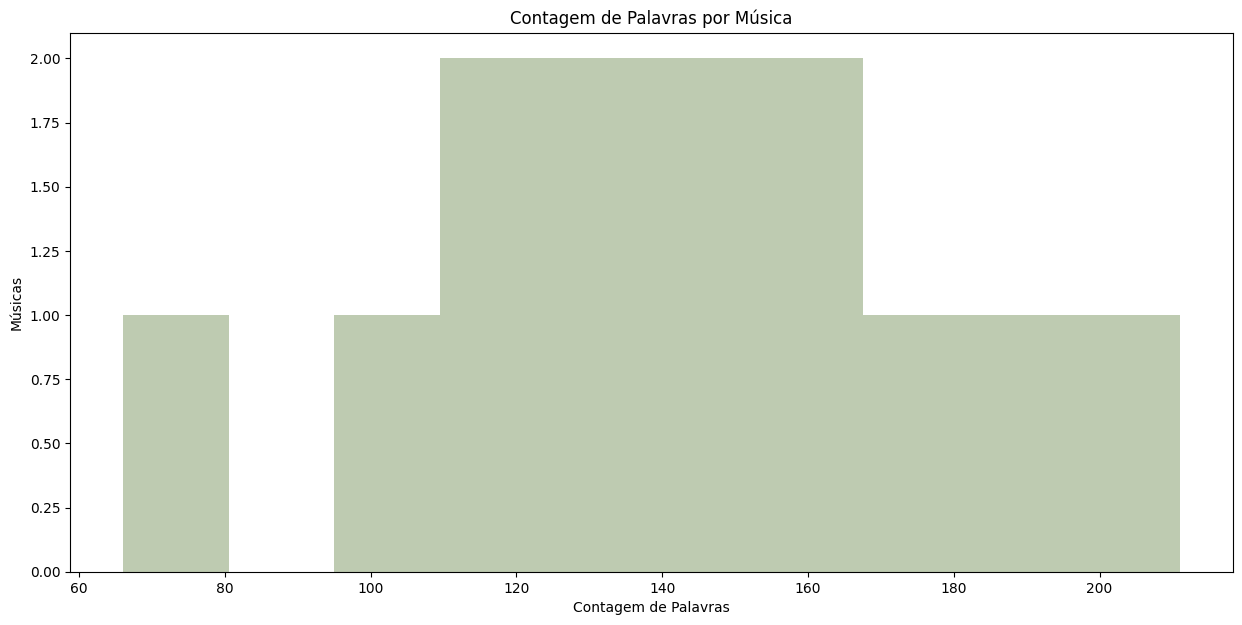

In [139]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df_l1['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

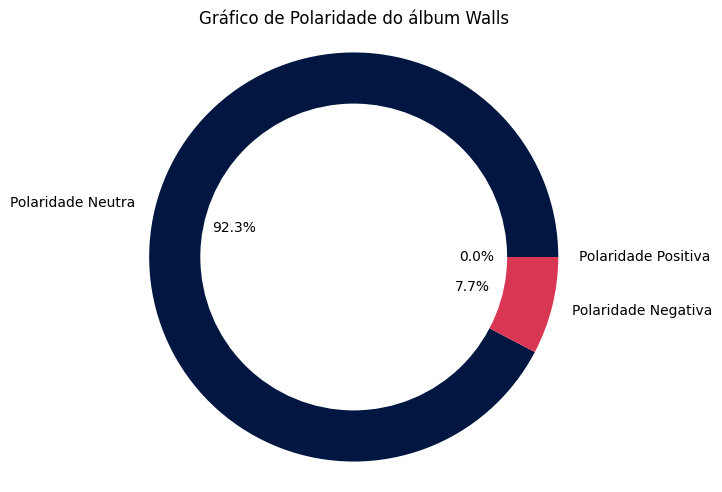

In [140]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_l1['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_l1['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do álbum Walls')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    A discografia apresenta 7.7% de polaridade negativa.
</div>

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count', 'score',
       'sentiment', 'filter'],
      dtype='object')


<ipython-input-141-ef24435a50bc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l1['lyrics'] = df_l1['lyrics'].fillna('')  # Substitui valores nulos por string vazia


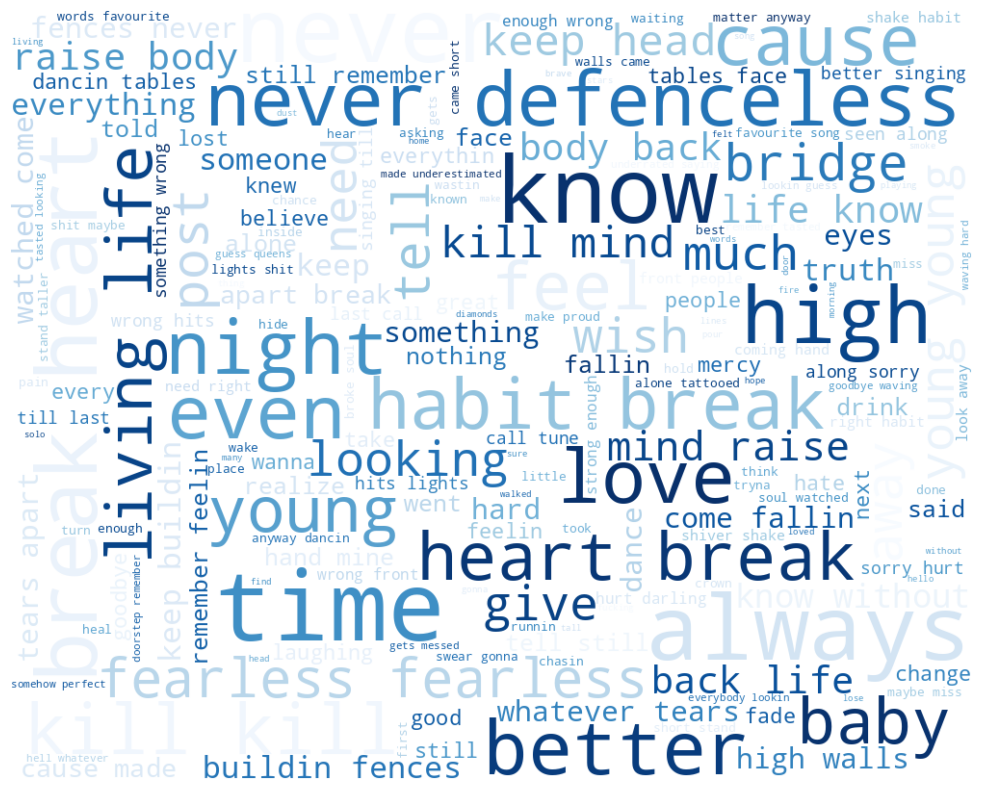

In [141]:
# Exibir os nomes das colunas do DataFrame
print(df_l1.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df_l1.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df_l1['lyrics'] = df_l1['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df_l1['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

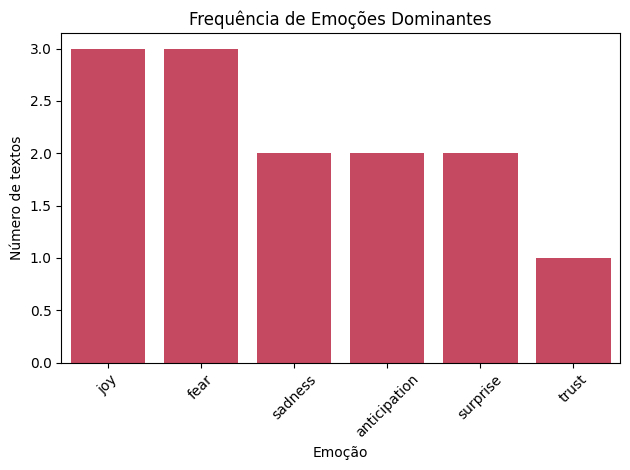

In [142]:
# Construção da barra por contagem
sns.countplot(
    x='sentiment',
    data=df_l1,
    order=df_l1['sentiment'].value_counts().index,
    color='#D93654'  # cor personalizada
)

# Gerando o gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout() #Ajuste automático
plt.show()

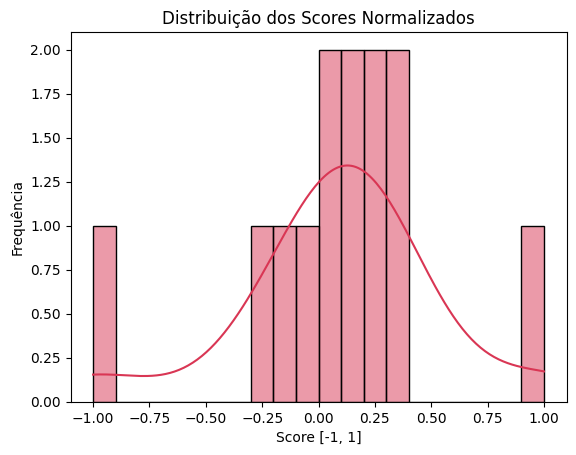

In [143]:
## Construção do Histograma
sns.histplot(df_l1['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

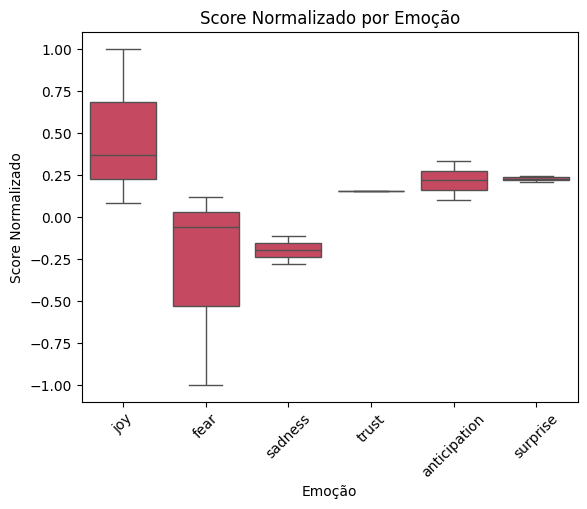

In [144]:
sns.boxplot(x='sentiment', y='score', data=df_l1, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

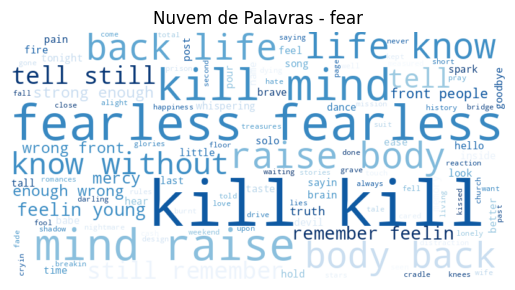

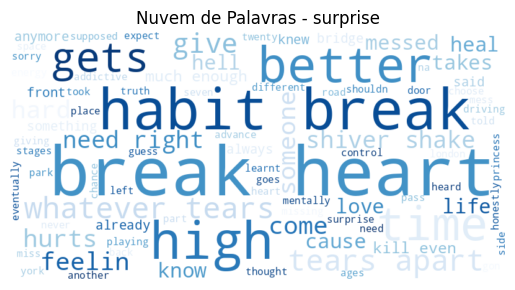

Nenhuma letra encontrada para a emoção 'disgust'.
Nenhuma letra encontrada para a emoção 'anger'.


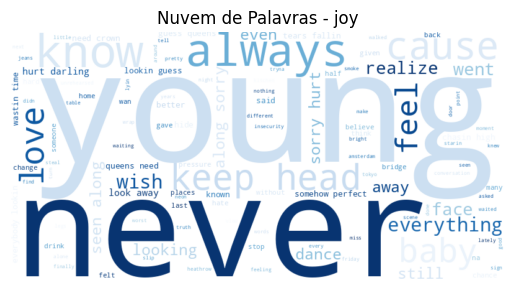

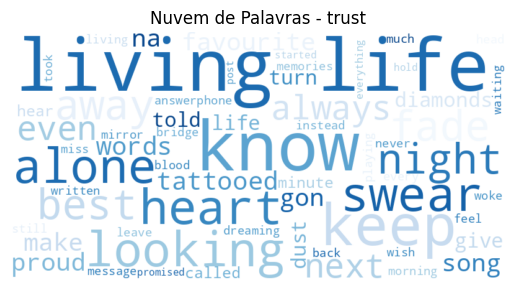

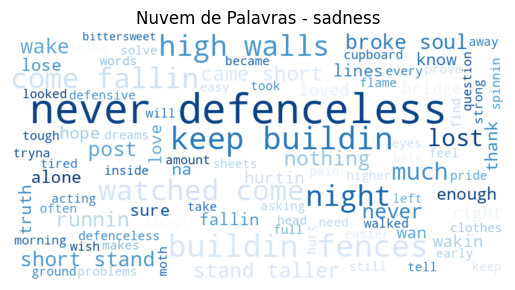

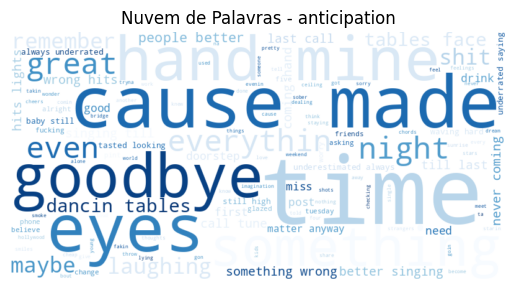

In [145]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []

    # Verificar se há letras associadas à emoção
    emotion_lyrics = df_l1[df_l1['sentiment'] == emotion]['lyrics']

    # Verifica se a emoção tem textos associados
    if not emotion_lyrics.empty:
        for text in emotion_lyrics:
            words.extend(word_tokenize(text.lower()))

        # Se houver palavras associadas à emoção
        if words:
            # Gerar a nuvem de palavras com fundo branco e tons de azul
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',  # Fundo branco
                colormap='Blues'  # Paleta de tons de azul
            ).generate(' '.join(words))

            # Mostrar a nuvem de palavras
            plt.figure()
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - {emotion}')
            plt.show()
        else:
            print(f"Nenhuma palavra encontrada para a emoção '{emotion}'.")
    else:
        print(f"Nenhuma letra encontrada para a emoção '{emotion}'.")

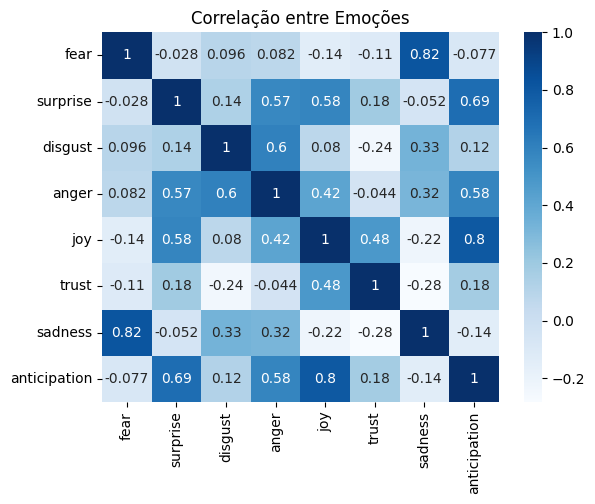

In [146]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df_l1['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

### Análise do Álbum Faith In The Future

*Faith in the Future* é o segundo álbum de estúdio do cantor e compositor inglês. Foi lançado em 11 de novembro de 2022 de forma independente pela *BMG*. Tomlinson anunciou a data de lançamento do álbum, a lista de faixas e a arte do álbum em 31 de agosto de 2022. O álbum foi apoiado por três *singles*: "Bigger Than Me", "Out of My System" e "Silver Tongues". O álbum estreou em primeiro lugar no Reino Unido, tornando-se seu primeiro no país como artista solo. Para promover *Faith in the Future*, Tomlinson embarcou na *Faith in the Future World Tour*, que começou em maio de 2023.

Mais informações em: https://en.wikipedia.org/wiki/Faith_in_the_Future_(Louis_Tomlinson_album)


In [147]:
# Filtrando o DataFrame para excluir músicas do seu álbum
df_l2 = df[df['Album'].isin(['Faith in the Future (Bonus Edition)'])]

# Exibindo o DataFrame filtrado
df_l2

title  \
13                    Bigger Than Me   
14                    Silver Tongues   
15        Written All Over Your Face   
16                            Change   
17                           Chicago   
18                       Lucky Again   
19                         Saturdays   
20                      The Greatest   
21                     All This Time   
22                        Angels Fly   
23  She Is Beauty We Are World Class   
24           Holding On To Heartache   
25                    Face the Music   
26                          Headline   
27          That’s the Way Love Goes   
28                     Common People   
29                  Out of My System   
30                High In California   

                                               lyrics  \
13  when somebody told would change used hide behi...   
14  gettin high amber wave going deep ones same ma...   
15  babe written face hurricane behind door come r...   
16  time lives easy gettin complete long away know...   
17  baby names liked brother doin okay still getti...   
18  give give gone away just tell another lived li...   
19  supposed feelin dirty cheap silver street quar...   
20  tell nothing could make late said plan time ca...   
21  three four late tryna find words ages just pat...   
22  nothin really matters nothin really hurts talk...   
23  conversation currency shapes become language s...   
24  said holdin heartache said wear like crown gon...   
25  good right wrong stories made young scare love...   
26  sometimes wake hear silence pride hide beauty ...   
27  here words know wanna hear think moved mate al...   
28  came good home house full terrace dreams enoug...   
29  slowly never wanna slowly wanna faster towards...   
30  blue like light surroundin seems different aro...   

                                  Album  release_year  Word Count     score  \
13  Faith in the Future (Bonus Edition)          2022         134 -0.027027   
14  Faith in the Future (Bonus Edition)          2022         162  0.297297   
15  Faith in the Future (Bonus Edition)          2022          91  0.117117   
16  Faith in the Future (Bonus Edition)          2022         152  0.117117   
17  Faith in the Future (Bonus Edition)          2022         125  0.081081   
18  Faith in the Future (Bonus Edition)          2022         134  0.279279   
19  Faith in the Future (Bonus Edition)          2022         163 -0.441441   
20  Faith in the Future (Bonus Edition)          2022          96  0.135135   
21  Faith in the Future (Bonus Edition)          2022          79  0.081081   
22  Faith in the Future (Bonus Edition)          2022         109  0.297297   
23  Faith in the Future (Bonus Edition)          2022          86  0.081081   
24  Faith in the Future (Bonus Edition)          2022         159 -0.171171   
25  Faith in the Future (Bonus Edition)          2022         104 -0.207207   
26  Faith in the Future (Bonus Edition)          2022         107 -0.045045   
27  Faith in the Future (Bonus Edition)          2022         129  0.135135   
28  Faith in the Future (Bonus Edition)          2022         102  0.153153   
29  Faith in the Future (Bonus Edition)          2022          90  0.063063   
30  Faith in the Future (Bonus Edition)          2022         161 -0.027027   

       sentiment   filter  
13          fear   neutro  
14  anticipation  intenso  
15  anticipation  intenso  
16  anticipation  intenso  
17           joy  intenso  
18           joy  intenso  
19          fear  intenso  
20  anticipation  intenso  
21  anticipation  intenso  
22  anticipation  intenso  
23           joy  intenso  
24       sadness  intenso  
25       sadness  intenso  
26          fear   neutro  
27           joy  intenso  
28           joy  intenso  
29         trust  intenso  
30          fear   neutro

In [148]:
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_l2['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 2059 palavras no dataset de letra.
Existem 570 palavras únicas no dataset de letras.


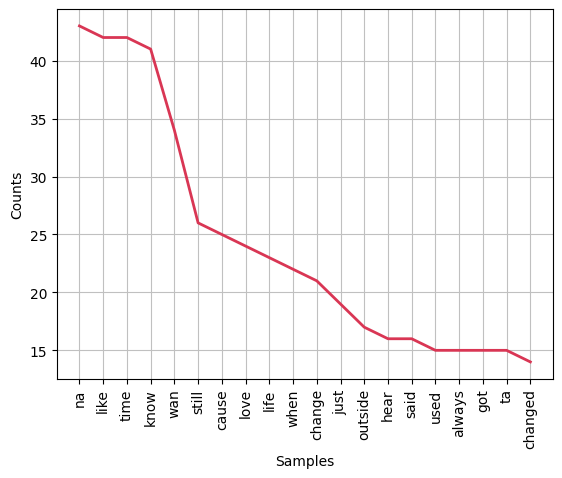

In [149]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

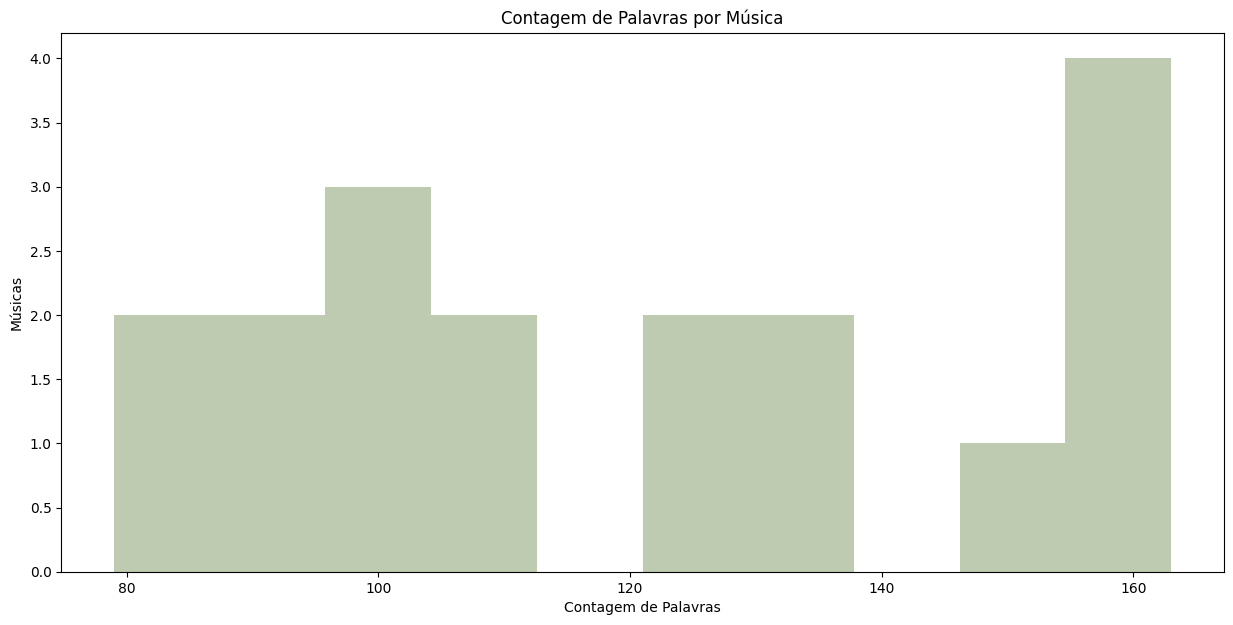

In [150]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df_dopamine
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df_l2['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

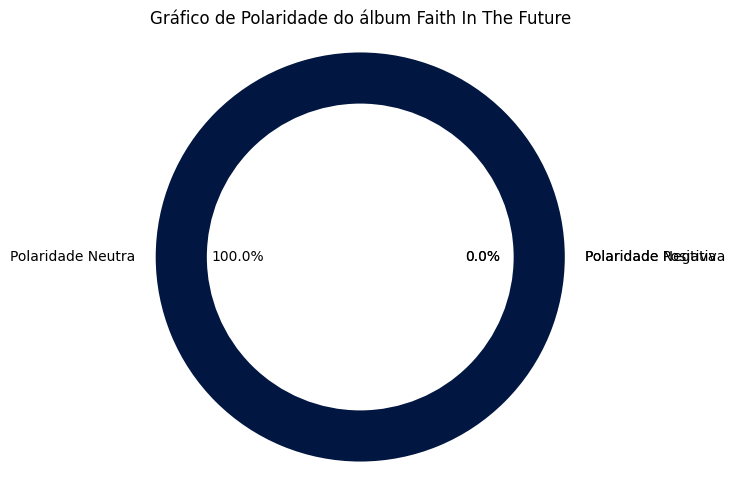

In [151]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_l2['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_l2['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do álbum Faith In The Future')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    O álbum apresenta apenas polaridade neutra.
</div>

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count', 'score',
       'sentiment', 'filter'],
      dtype='object')


<ipython-input-152-721a85a7eeed>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l2['lyrics'] = df_l2['lyrics'].fillna('')  # Substitui valores nulos por string vazia


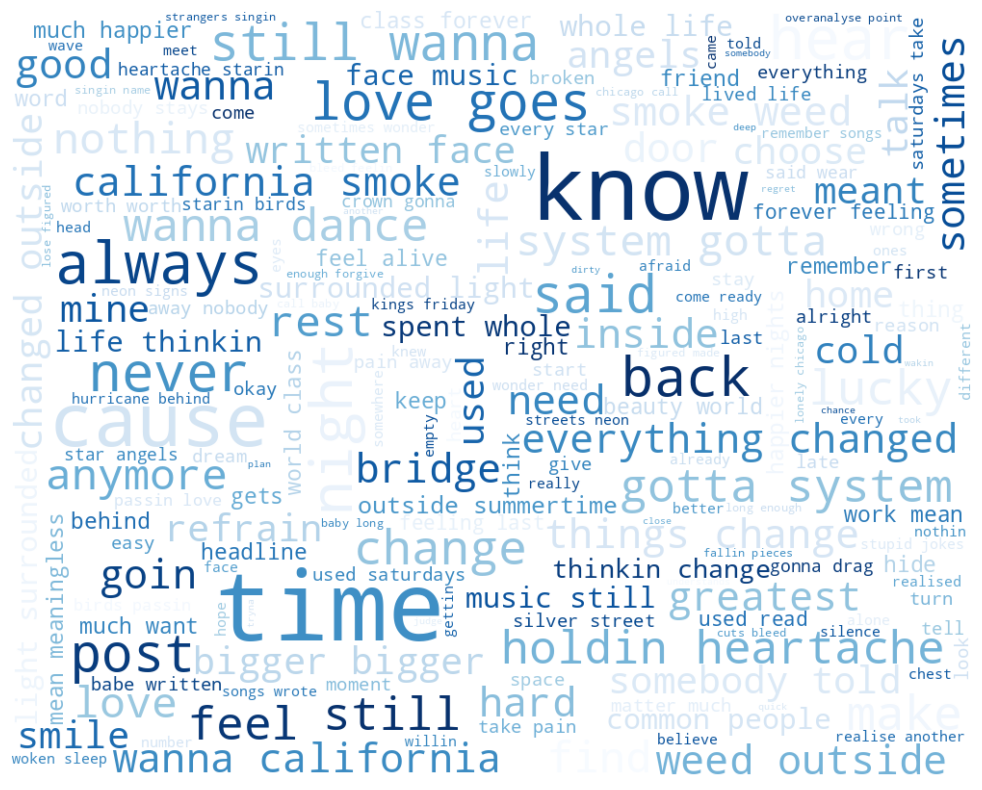

In [152]:
# Exibir os nomes das colunas do DataFrame
print(df_l2.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df_l2.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df_l2['lyrics'] = df_l2['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df_l2['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

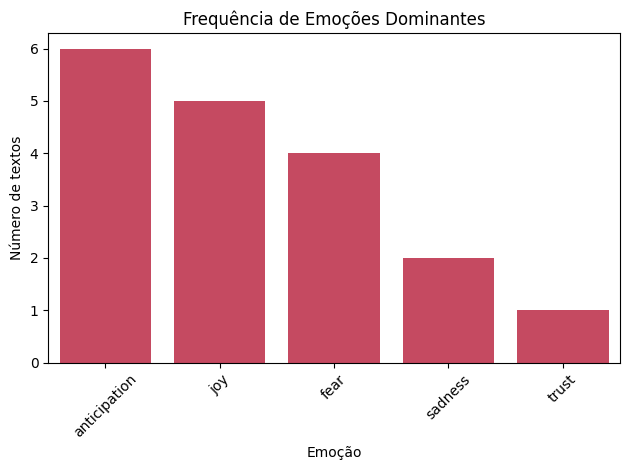

In [153]:
# Construção da barra por contagem
sns.countplot(
    x='sentiment',
    data=df_l2,
    order=df_l2['sentiment'].value_counts().index,
    color='#D93654'  # cor personalizada
)

#Exibição do gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

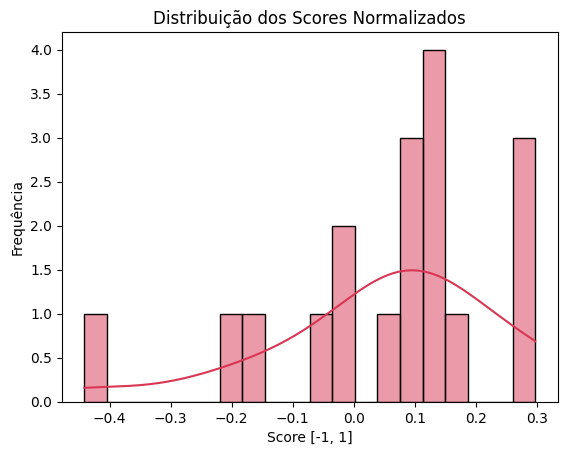

In [154]:
# Gerando o Histograma
sns.histplot(df_l2['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

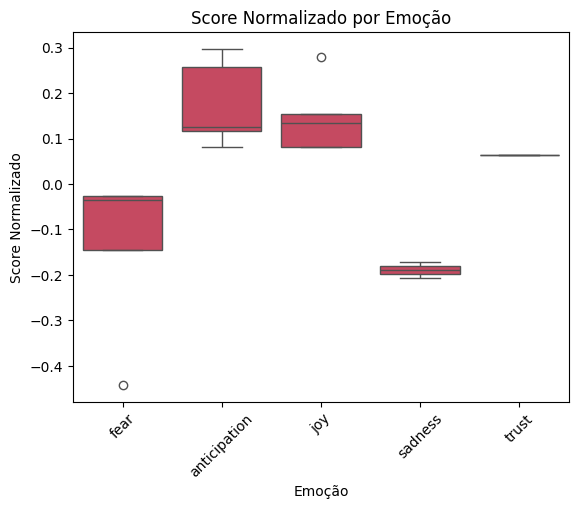

In [155]:
# Gerando o Boxplot
sns.boxplot(x='sentiment', y='score', data=df_l2, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

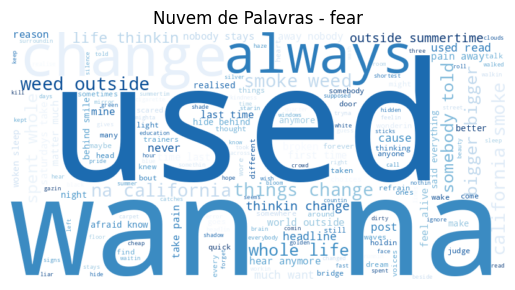

Nenhuma letra encontrada para a emoção 'surprise'.
Nenhuma letra encontrada para a emoção 'disgust'.
Nenhuma letra encontrada para a emoção 'anger'.


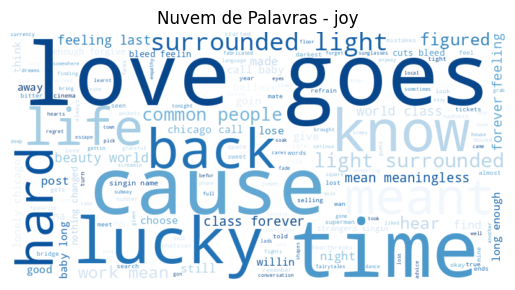

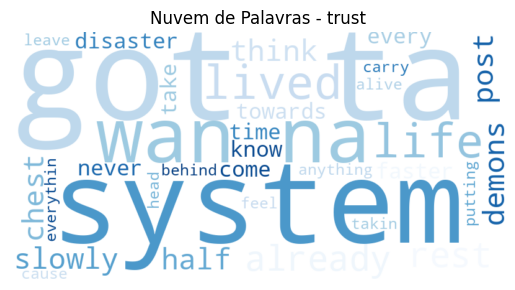

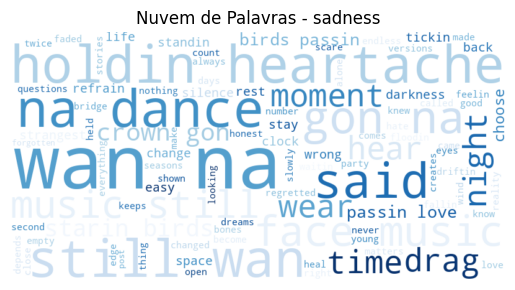

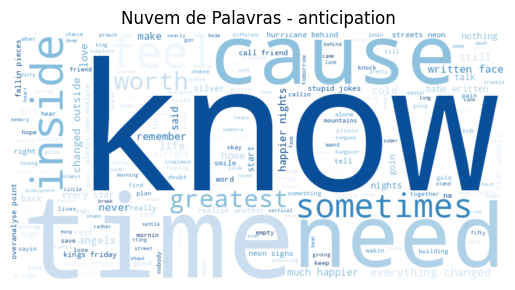

In [156]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []

    # Verificar se há letras associadas à emoção
    emotion_lyrics = df_l2[df_l2['sentiment'] == emotion]['lyrics']

    # Verifica se a emoção tem textos associados
    if not emotion_lyrics.empty:
        for text in emotion_lyrics:
            words.extend(word_tokenize(text.lower()))

        # Se houver palavras associadas à emoção
        if words:
            # Gerar a nuvem de palavras com fundo branco e tons de azul
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',  # Fundo branco
                colormap='Blues'  # Paleta de tons de azul
            ).generate(' '.join(words))

            # Mostrar a nuvem de palavras
            plt.figure()
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - {emotion}')
            plt.show()
        else:
            print(f"Nenhuma palavra encontrada para a emoção '{emotion}'.")
    else:
        print(f"Nenhuma letra encontrada para a emoção '{emotion}'.")

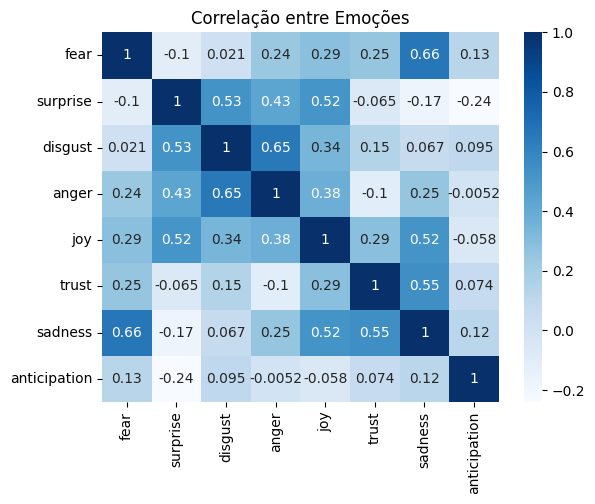

In [157]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df_l2['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()